# Long term goals:

* quick reminder of what graphs are
* learn to represent networks (graphs) in python
* create some interesting (realistic?) networks
* describe some important or interesting properties of networks mathematically
* create a model for processes on networks


In [22]:
class Graph(): # creates a class called graph so that we can have objects inside that do things
    def __init__(self): # initializes values of "instance members" of new class
        self.edges = [] # a list of tuples to define our edges
        self.nodes = []
        
    def add_node(self,node):
        if node not in self.nodes:
            self.nodes.append(node)
    
    def add_edge(self,node1,node2): # 3 arguments, first is structural, others involve what we want to create
        self.add_node(node1)
        self.add_node(node2)
        if (node1,node2) not in self.edges:
            self.edges.append((node1,node2))
            
    def __str__(self):
        return str(self.edges)
    
# Test
g = Graph()
g.add_edge(0,1)
g.add_edge(0,1)
g.add_edge(0,2)
print(g)
    

[(0, 1), (0, 2)]


In [23]:
print(g)

[(0, 1), (0, 2)]


In [27]:
g.edges

[(0, 1), (0, 2)]

In [28]:
g.nodes

[0, 1, 2]

So eventually out of what we've done so far we want to have a model with 1 infected person, and then be able to see all people connected to that infected person. To do this, we have to be able to go through each edge, and select what edges mention the infected node but not the others, and then "put" those nodes somewhere. (then eventually we have to continue this for a second infected person etc)

The data structure we will have to use is a dictionary. Ex:

In [31]:
a = {1:[2,3], 0:[1,4]}
a

{1: [2, 3], 0: [1, 4]}

In [33]:
2 in a

False

In [34]:
0 in a

True

The numbers that are on the left of the colon are called "keys", so thus far we have only 2 keys, 1 and 0. Nodes will be the keys here.

In [50]:
class Graph(): # creates a class called graph so that we can have objects inside that do things
    def __init__(self): # initializes values of "instance members" of new class
        # self.edges = [] # a list of tuples to define our edges
        # self.nodes = []
        self.graphdict = {} # for every node, a list of nodes that are connected to it
        
    def add_node(self,node): # if node is not in dictionary, add it here
        if node not in self.graphdict:
            self.graphdict[node] = []
    
    def add_edge(self,node1,node2): # 3 arguments, first is structural, others involve what we want to create
        self.add_node(node1)
        self.add_node(node2)
        # instead of adding edges we want to add node2 as a connection to node1 and vice versa
        if node2 not in self.graphdict[node1]: # make sure the nodes are connected to each other
            self.graphdict[node1].append(node2)
        if node1 not in self.graphdict[node2]:
            self.graphdict[node2].append(node1)
        
    def __str__(self): # allows you to print what's going on in the class
        out = 'A graph of ' + str(len(self.graphdict)) + ' nodes:\n' # makes output into a table
        for node in self.graphdict:
            out += str(node) + ':' + str(self.graphdict[node]) + '\n'
        return out
        
    
# Test
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_node(7)
print(g)
    

A graph of 7 nodes:
0:[1, 2]
1:[0]
2:[0]
3:[4]
4:[3, 5]
5:[4]
7:[]



# Next step: Random Networks

1. Create random networks

2. Try to visualize them

3. Calculate some simple stats (degree distribution, meaning how many edges each node has)

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

To visualize, we will use a new package. Go to Anaconda and install networkx, then import it here as nx

In [87]:
# example of calling items from dictionary
a = {1:'dog', 2:'cat'}
for key,value in a.items():
    print(key,value)

1 dog
2 cat


A graph of 7 nodes:
0:[1, 2]
1:[0]
2:[0]
3:[4]
4:[3, 5]
5:[4]
7:[]

Nodes: [0, 1, 2, 3, 4, 5, 7]
Edges: [(0, 1), (0, 2), (3, 4), (4, 5)]


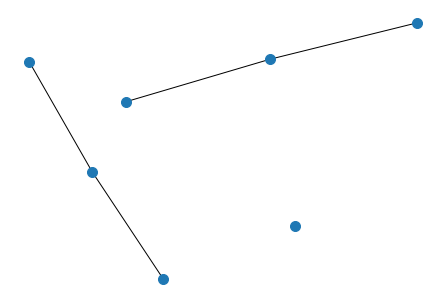

In [129]:
class Graph(): # creates a class called graph so that we can have objects inside that do things
    def __init__(self): # initializes values of "instance members" of new class
        # self.edges = [] # a list of tuples to define our edges
        # self.nodes = []
        self.graphdict = {} # for every node, a list of nodes that are connected to it
        
    def add_node(self,node): # if node is not in dictionary, add it here
        if node not in self.graphdict:
            self.graphdict[node] = []
    
    def add_edge(self,node1,node2): # 3 arguments, first is structural, others involve what we want to create
        self.add_node(node1)
        self.add_node(node2)
        # instead of adding edges we want to add node2 as a connection to node1 and vice versa
        if node2 not in self.graphdict[node1]: # make sure the nodes are connected to each other
            self.graphdict[node1].append(node2)
        if node1 not in self.graphdict[node2]:
            self.graphdict[node2].append(node1)
            
    def nodes(self):
        """ returns a list of nodes, for use in networkx """
        return list(self.graphdict.keys())
    
    def edges(self):
        """ returns a list of edges, for use in networkx """
        out = []
        for key,values in self.graphdict.items():
            for value in values:
                if value>key:
                    out.append((key,value))
        return out
        
        
    def __str__(self):
        out = 'A graph of ' + str(len(self.graphdict)) + ' nodes:\n' # makes output into a table
        for node in self.graphdict:
            out += str(node) + ':' + str(self.graphdict[node]) + '\n'
        return out
    
    def plot(self):
        """ creates a plot """
        g_nx = nx.Graph()
        g_nx.add_nodes_from(self.nodes())
        g_nx.add_edges_from(self.edges())
        nx.draw_kamada_kawai(g_nx, node_size=100) # default node size is 300
        
    
# Test
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_node(7)
print(g)
print('Nodes:', g.nodes())
print('Edges:', g.edges())
g.plot()

In [46]:
np.random.randint(low=0, high=1) # high doesn't mean highest value, it means highest value +1 b/c zero indexing

0

In [64]:
# proof that the code to ensure no duplicates did something
a = 1
b = 2
a,b = b,a
print(a,b)

2 1


0 20
39 40
11 26
14 27
20 21
32 48
5 37
9 23
30 40
8 45
20 40
32 40
6 19
44 49
21 44
5 26
7 46
29 45
25 37
12 39
11 14
6 35
2 26
5 38
4 12
19 41
7 38
0 41
7 13
9 40
34 43
0 37
21 30
12 40
18 36
1 40
14 28
22 37
1 49
13 29
26 31
8 49
1 22
12 19
10 30
2 17
15 27
5 14
27 28
18 27


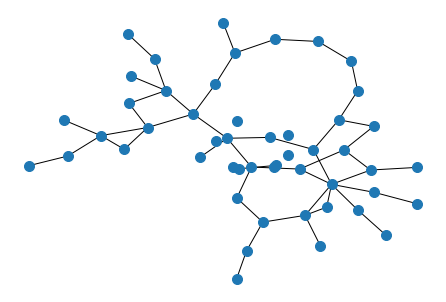

In [131]:
# Create a random network

N_NODES = 50
N_EDGES = N_NODES

g = Graph()
for i in range(N_NODES):
    g.add_node(i)
edges = []
while len(edges)<N_EDGES:
    n1 = np.random.randint(low=0, high=N_NODES) # need to use numpy random generator
    n2 = np.random.randint(low=0, high=N_NODES)
    if n2<n1:
        n1,n2 = n2,n1 # makes sure of no duplicate edges
    
    if (n1,n2) not in edges and n1!=n2: # if an edge doesn't already exist and doesn't form a loop
        g.add_edge(n1,n2) # then add it
        edges.append((n1,n2)) # actually add it
        print(n1,n2)
    
#print(g)
g.plot() # create plot

[3, 3, 2, 0, 1, 4, 2, 3, 2, 2, 1, 2, 4, 2, 4, 1, 0, 1, 2, 3, 3, 3, 2, 1, 0, 1, 4, 4, 2, 2, 3, 1, 2, 0, 1, 1, 1, 4, 2, 2, 7, 2, 0, 1, 2, 2, 1, 0, 1, 3]
[ 6. 13. 16.  8.  6.  0.  0.  1.]


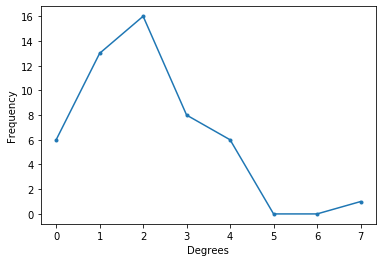

In [136]:
degrees = [] # create empty list of course
for node,links in g.graphdict.items():
    degrees.append(len(links)) # fill the list with degrees of the nodes
print(degrees) 

hist = np.zeros(max(degrees)+1) # shift x axis so that all values are visible b/c of zero indexing
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist, '.-');
plt.xlabel('Degrees');
plt.ylabel('Frequency');